In [1]:
#importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import collections

from CameraCalibration import *
from Line import *
from Perspective import *
from Pipeline import *
from moviepy.editor import VideoFileClip

%matplotlib inline

In [2]:
#Calibrating the camera
cc = CameraCalibrate('camera_cal/')

camera_cal/calibration12.jpg
camera_cal/calibration19.jpg
camera_cal/calibration4.jpg
camera_cal/calibration16.jpg
camera_cal/calibration10.jpg
camera_cal/calibration7.jpg
camera_cal/calibration5.jpg
camera_cal/calibration13.jpg
camera_cal/calibration2.jpg
camera_cal/calibration14.jpg
camera_cal/calibration20.jpg
camera_cal/calibration18.jpg
camera_cal/calibration1.jpg
camera_cal/calibration15.jpg
camera_cal/calibration8.jpg
camera_cal/calibration6.jpg
camera_cal/calibration17.jpg
camera_cal/calibration3.jpg
camera_cal/calibration11.jpg
camera_cal/calibration9.jpg


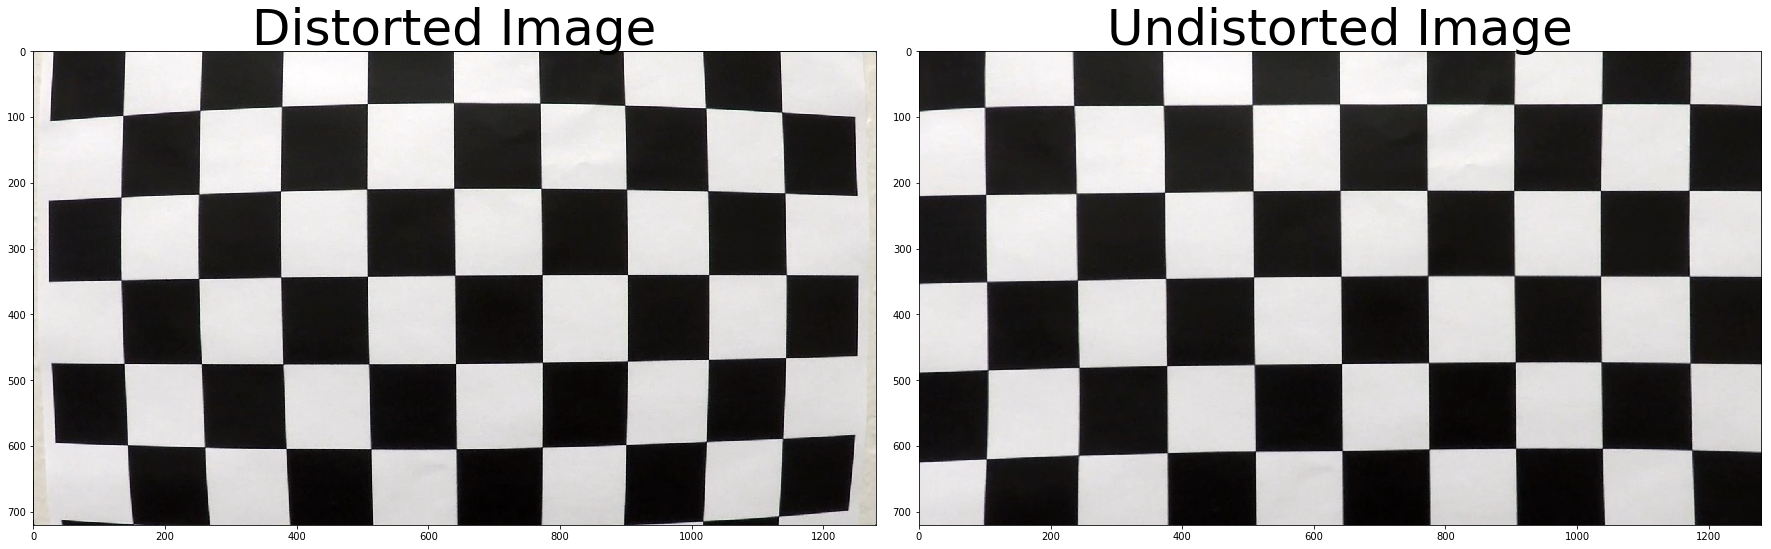

In [3]:
# Displaying a test image after distortion correction
raw_img = mpimg.imread('./camera_cal/calibration1.jpg')
undistort = cc(raw_img)
plotImgs(raw_img, "Distorted Image", undistort, "Undistorted Image")

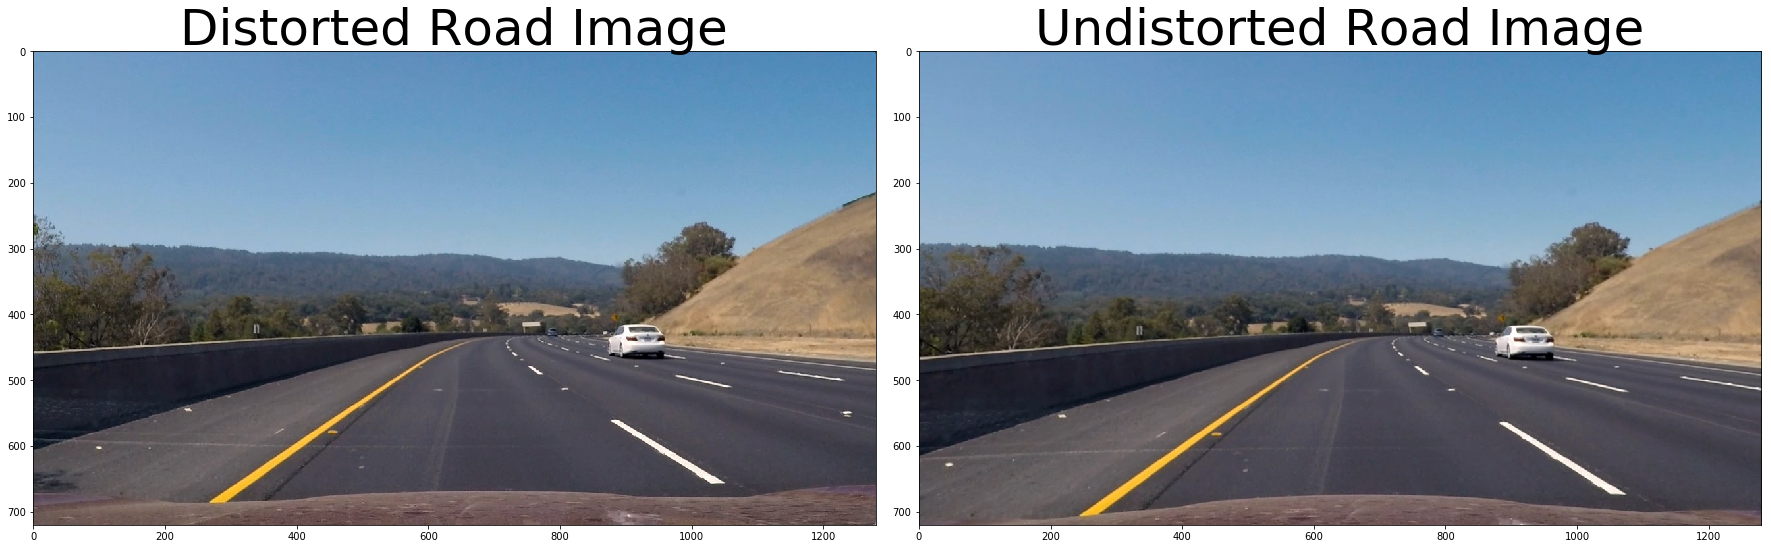

In [4]:
# test image after distortion correction
img = mpimg.imread('./test_images/test3.jpg')
undist_road = cc(img)
plotImgs(img, "Distorted Road Image", undist_road, "Undistorted Road Image")

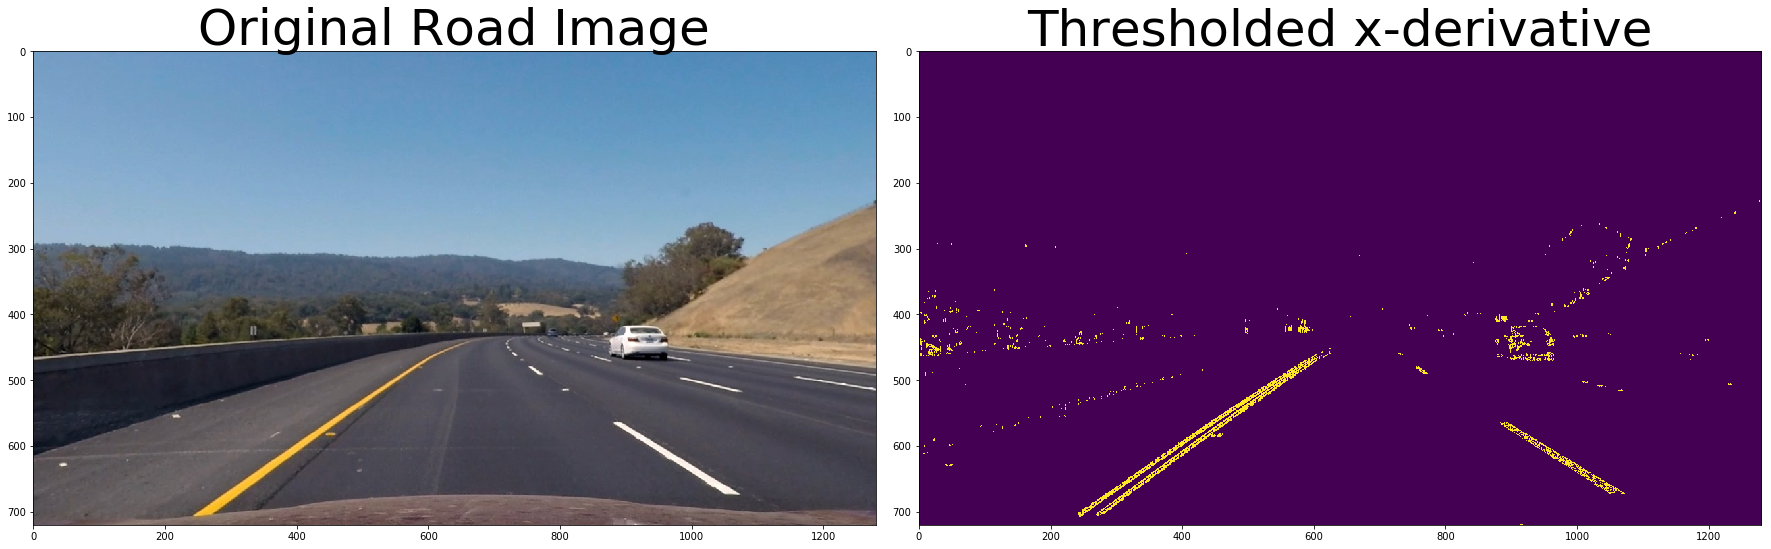

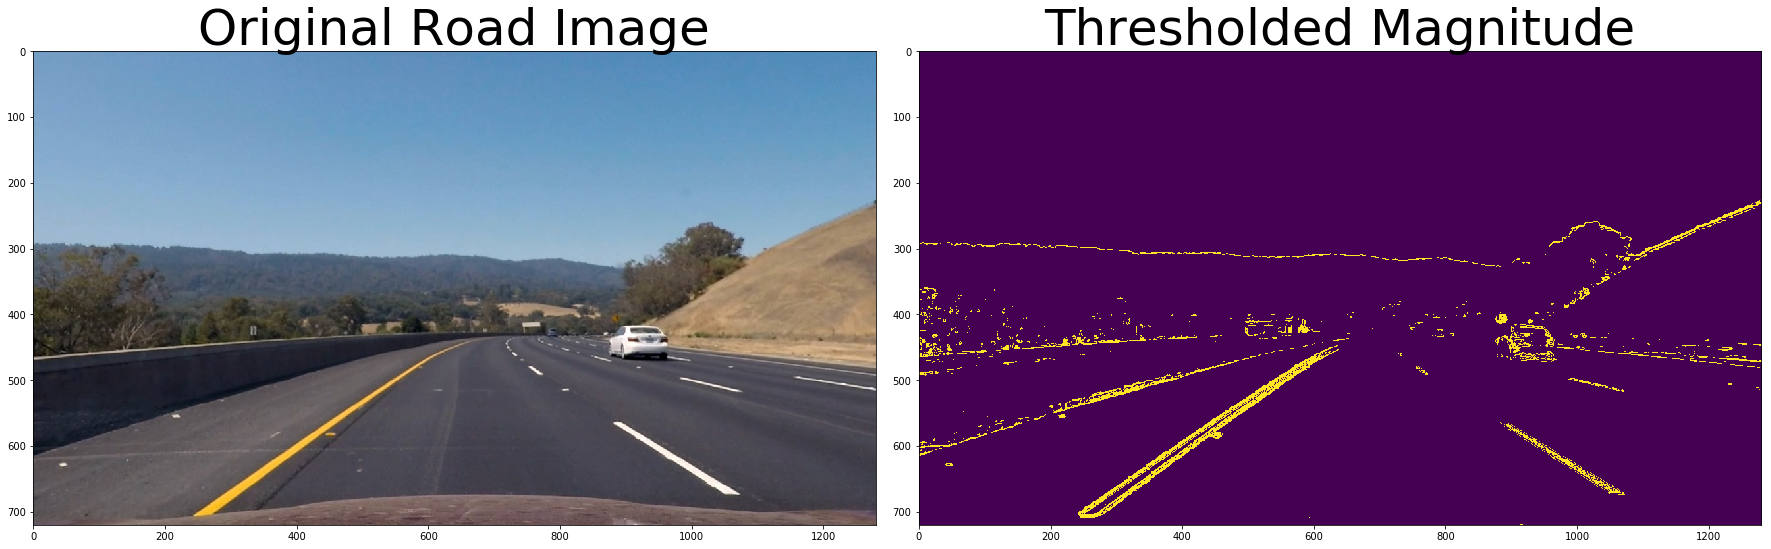

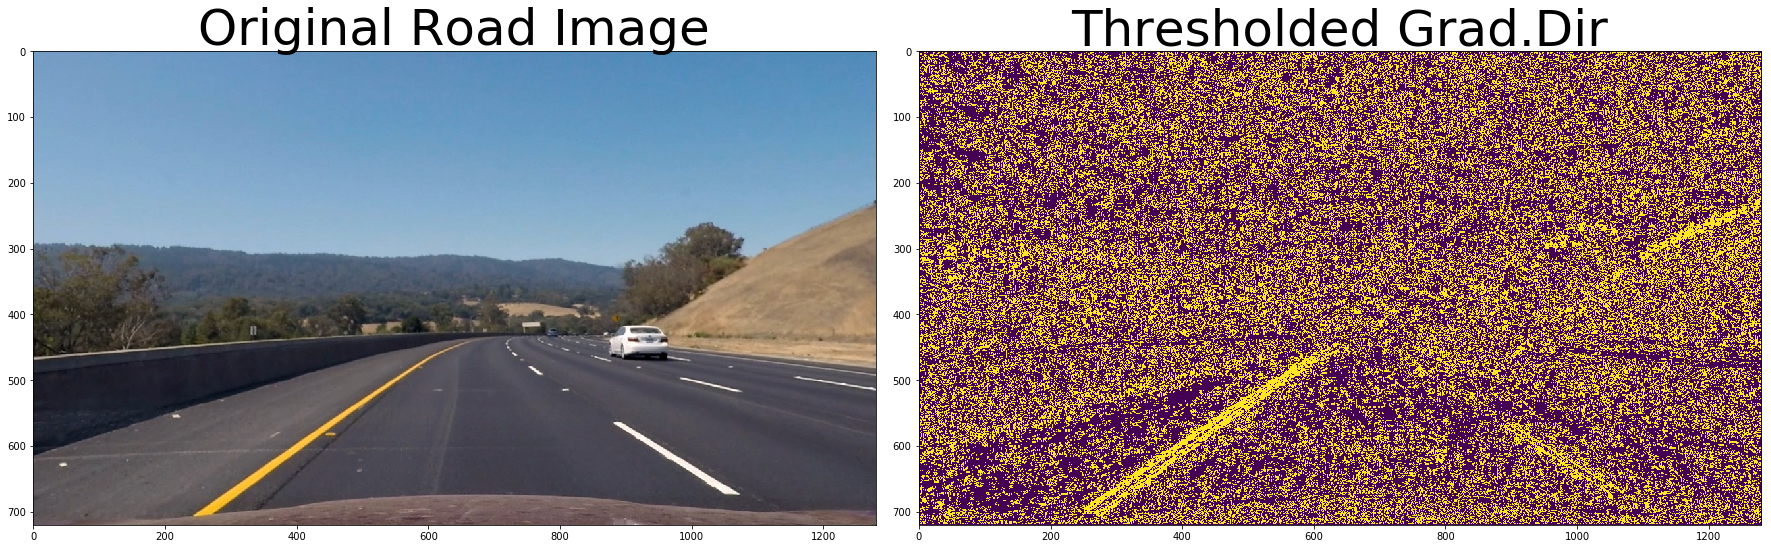

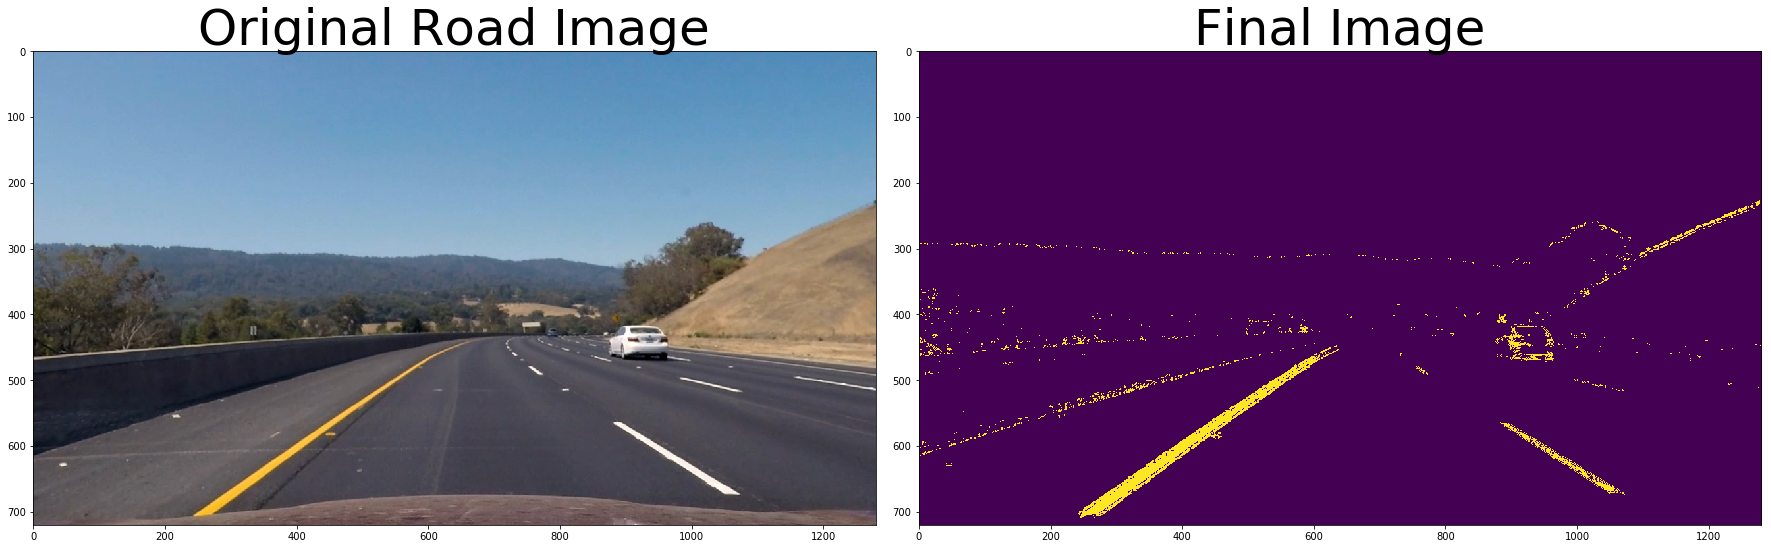

In [5]:
#images after applying sobel
pp = processingPipeline()
pp.plot_abs_sobel_threshold(undist_road)
pp.plot_mag_sobel_threshold(undist_road)
pp.plot_dir_sobel_threshold(undist_road)
plotImgs(undist_road,"Original Road Image", pp(undist_road), "Final Image")


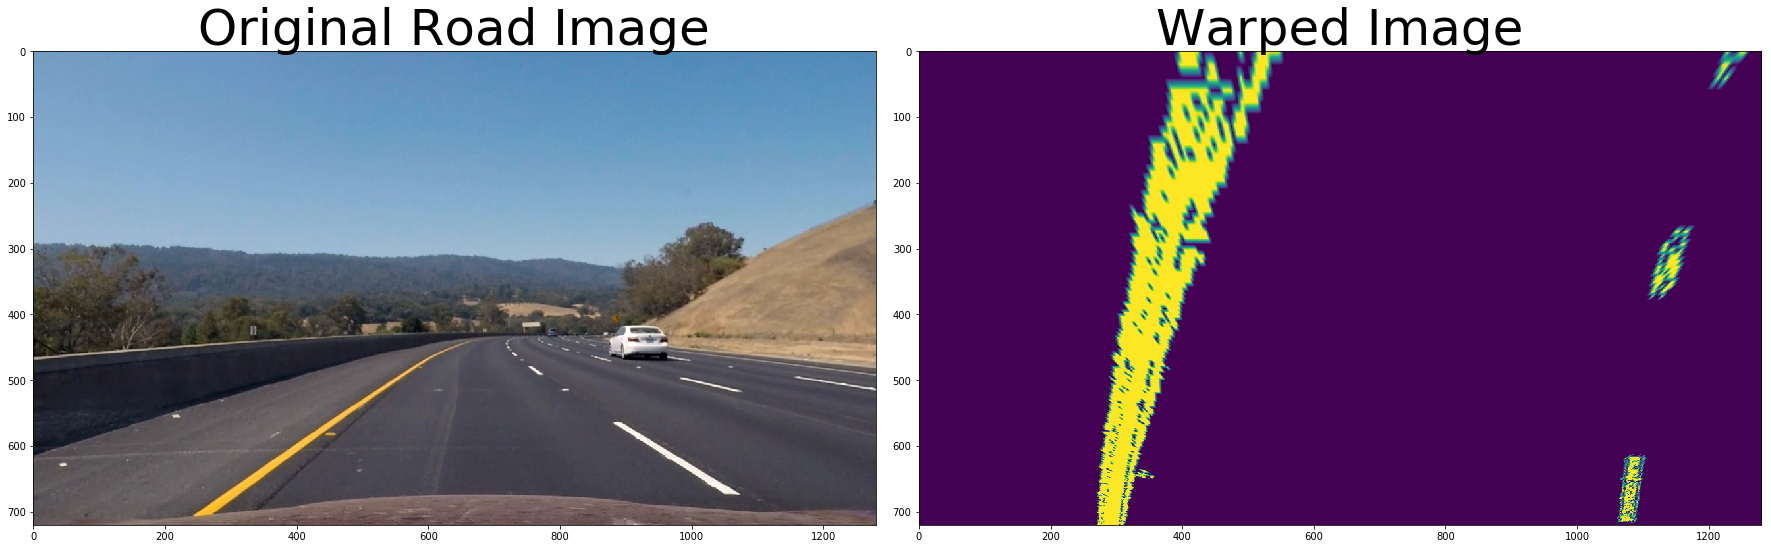

In [6]:
#warping the image
warped_image = gradWarpPipeline()(undist_road)
plotImgs(undist_road, "Original Road Image", warped_image, "Warped Image")

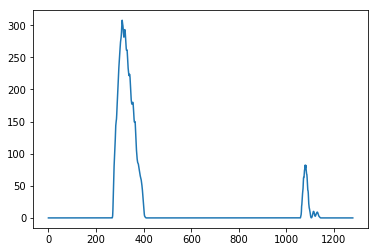

In [8]:
# Histogram for warped image, intensity is denoted by peak.
histogram = np.sum(warped_image[warped_image.shape[0]//2:,:], axis=0)
plt.plot(histogram)

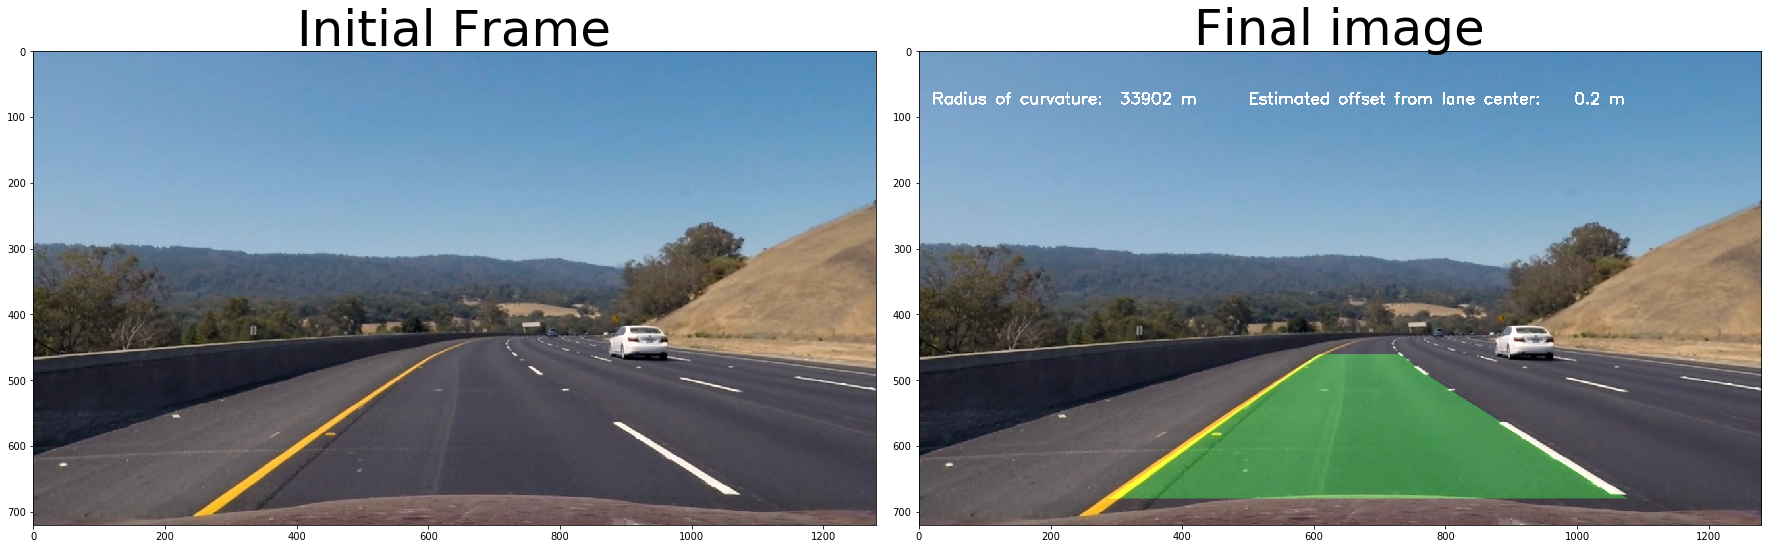

In [9]:
image_with_lanes = laneTracker(np.copy(undist_road)).find_lanes(np.copy(undist_road))
plotImages(undist_road,"Initial Frame", image_with_lanes, "Final image")

In [11]:
video_output_name = 'project_video_final.mp4'
video = VideoFileClip("project_video.mp4")

finder = laneTracker(cc(video.get_frame(0)))
video_output = video.fl_image(finder.find_lanes)
%time video_output.write_videofile(video_output_name, audio=False)

[MoviePy] >>>> Building video project_video_annotated.mp4
[MoviePy] Writing video project_video_annotated.mp4


100%|█████████▉| 1260/1261 [04:08<00:00,  5.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_annotated.mp4 

CPU times: user 5min 17s, sys: 8.82 s, total: 5min 26s
Wall time: 4min 9s
